In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import os

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")


In [5]:
url="Heart_kaggle1.xlsx"

In [6]:
df =pd.read_excel(url)

In [7]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
print("Rows: ",len(df))
print("Column: ",df.shape[1])

Rows:  1025
Column:  14


In [9]:
# missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#total percentage of missing data
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Age distribution.')

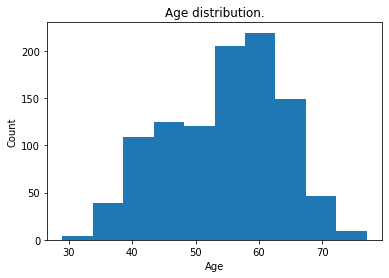

In [12]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution.')

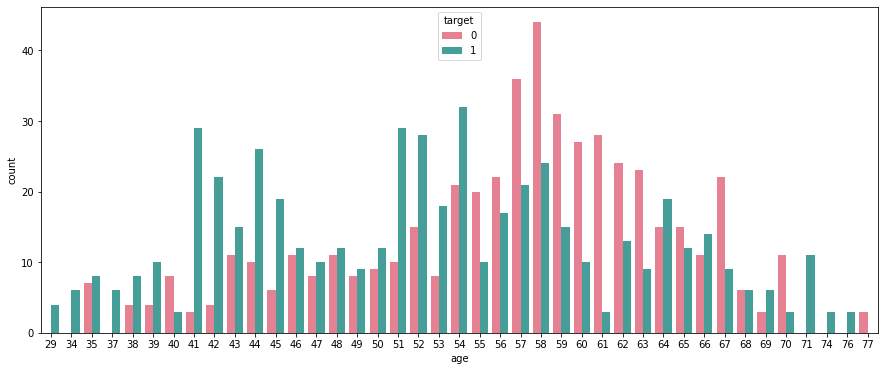

In [13]:
#Number of people who have disease vs age
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='husl')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Frequency'>

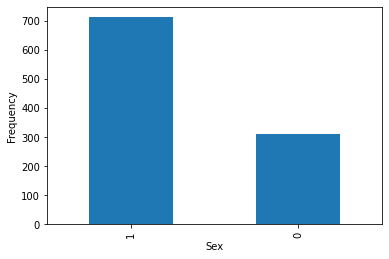

In [14]:
plt.xlabel('Sex')
plt.ylabel('Frequency')
df['sex'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Count'>

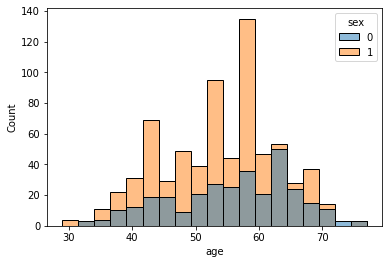

In [15]:
sns.histplot(data=df, x="age", hue="sex")

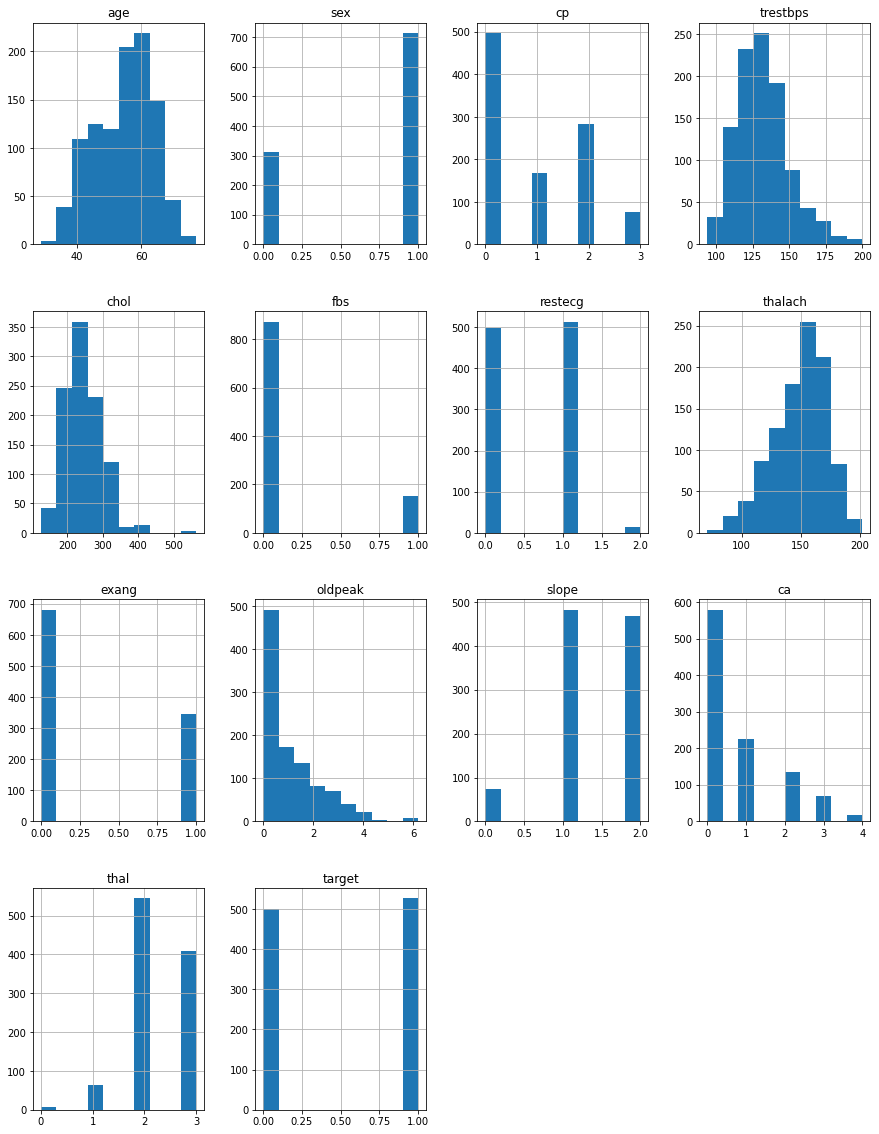

In [16]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

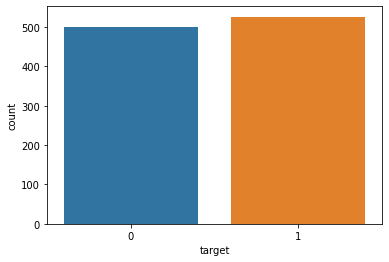

There are 499 patients without heart disease and 526 patients with the disease


In [17]:
#Case counts

sns.countplot(x='target',data=df)
plt.show()
cases = df.target.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

In [18]:
#Investigating age values
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.43414634146342


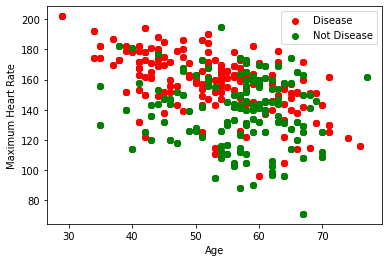

In [19]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

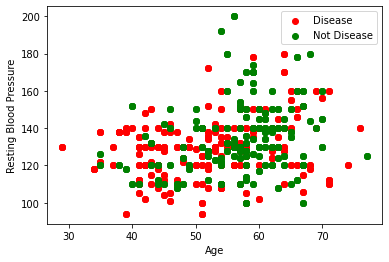

In [20]:
plt.scatter(x=df.age[df.target==1], y=df.trestbps[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.trestbps[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.show()

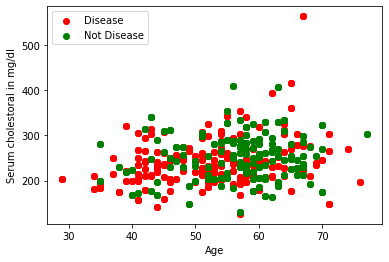

In [21]:
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Serum cholestoral in mg/dl")
plt.show()

In [22]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [23]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [24]:
#define the features
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	2


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=50, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x21F4D007E40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x21F4D007E40, verbose=2)

In [25]:
# show the most important features
most_important = df.columns[:-1][feat_selector.support_].tolist()
most_important

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [26]:
top_features = df.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [27]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [28]:
import statsmodels.api as sm

In [29]:
X_top = df[top_features]
y = df['target']

In [30]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.354132
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1012
Method:                           MLE   Df Model:                           12
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.4888
Time:                        11:52:11   Log-Likelihood:                -362.99
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                7.429e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0108      0.010      1.041      0.298      -0.009       0.031
sex           -1.7094      0.246     -6.946      0.000      -2.192      -1.227
cp             0.8434      0.100      8.469      0.000       0.648       1.039
trestbps      -0.0137      0.005     -2.586      0.010      -0.024      -0.003
chol          -0.0046      0.002     -2.263      0.024      -0.009      -0.001
fbs           -0.1483      0.283     -0.524      0.600      -0.703       0.406
restecg        0.5057      0.185      2.736      0.006       0.143       0.868
thalach        0.0328      0.005      7.110      0.000       0.024       0.042
exang         -0.8945      0.220     -4.064      0.000      -1.326      -0.463
oldpeak       -0.5282      0.113     -4.655      0.000      -0.751      -0.306
slope          0.5660      0.187      3.034      0.002       0.200       0.932
ca            -0.7502      0.102     -7.354      0.000      -0.950      -0.550
thal          -0.8280      0.154     -5.369      0.000      -1.130      -0.526
==============================================================================
"""

In [31]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

In [32]:
print(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("NEW",X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
807   44    1   2       130   233    0        1      179      1      0.4   
27    58    0   1       136   319    1        0      152      0      0.0   
77    63    1   0       140   187    0        0      144      1      4.0   
406   58    1   2       140   211    1        0      165      0      0.0   
886   61    1   0       120   260    0        1      140      1      3.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
808   51    1   2        94   227    0        1      154      1      0.0   
984   59    1   0       135   234    0        1      161      0      0.5   
717   56    1   2       130   256    1        0      142      1      0.6   
167   57    0   0       120   354    0        1      163      1      0.6   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
807      2   0     2  
27       2   2     2  
77       2   2    

In [33]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'dataset' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print(knn_clf, X_train, y_train, X_test, y_test, train=True)
print(knn_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Confussion matrix")
print(knn_conf_matrix)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test,knn_predicted))

In [ ]:
model_egb = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("Confussion matrix")
print(xgb_conf_matrix)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test,xgb_predicted))

In [ ]:
model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Confussion matrix")
print(dt_conf_matrix)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test,dt_predicted))


In [ ]:
model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Confussion matrix")
print(rf_conf_matrix)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test,rf_predicted))

In [ ]:
model_ev = pd.DataFrame({'Model': ['Stochastic Gradient Descent','K-Nearest Neighbour','Extreme Gradient Boost','Decision Tree','Random Forest'], 
                        'Accuracy':[ sgdc_acc_score*100, knn_acc_score*100,xgb_acc_score*100,dt_acc_score*100, rf_acc_score*100 ]})
model_ev

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange','magenta', 'cyan']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation=90)
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [ ]:
import joblib

# save
joblib.dump(rf, "./random_forest.joblib")

In [ ]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./random_forest.joblib")


print("1- Possibility of Heart Disease, ", loaded_rf.predict(X_test)[120])

In [ ]:
my_data= df[to]